In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [101]:
# Importamos los datos
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

print(df_test.head())
print(df_train.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1 

In [102]:
# A simple vista vemos que para este problema necesitamos implementar un algoritmo de supervisión. 
# Esto es porque si nos fijamos el df de train incluye una columna con información sobre si un pasajero
# sobrevivió o no. Entonces, vamos a realizar un entrenamiento con datos en donde conocemos el resultado

# VERSE DIFERENCIA ENTRE ALGORITMOS DE SUPERVISION Y NO SUPERVISION !!!!

# Observamos que tenemos muchos datos faltantes también ('NaN' en diversos campos). Entonces, deberemos 
# realizar un preprocesamiento de los datos. 

# ANALISIS DE LOS DATOS: para poder ver como proceder en su preprocesamiento, así como cúal es el mejor
# algoritmo para implementar

# Verificamos la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(df_train.shape)
print(df_test.shape)

Cantidad de datos:
(891, 12)
(418, 11)


In [103]:
# Verificamos el tipo de datos contenidos en ambos dataset
print('Tipo de datos:')
print(df_train.info())
print(df_test.info())

Tipo de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    i

In [104]:
# Verificamos los datos faltantes
print('Datos faltantes:')
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())

Datos faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [105]:
# Verificamos las estadísticas del dataset
print('Estadísticas del dataset:')
print(df_train.describe())
print(df_test.describe())

Estadísticas del dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp 

In [106]:
# PREPROCESAMIENTO DE LOS DATOS: 
    
# Cambio los datos de 'Sexo' (tipo object) por datos de tipo numérico
df_train['Sex'].replace(['female', 'male'], [0,1], inplace=True)
df_test['Sex'].replace(['female', 'male'], [0,1], inplace=True)

# Cambio los datos de 'Embarque' (tipo object) por datos de tipo numérico
df_train['Embarked'].replace(['Q', 'S', 'C'], [0,1,2], inplace=True)
df_test['Embarked'].replace(['Q', 'S', 'C'], [0,1,2], inplace=True)

# Hemos realizado los cambios anteriores porque los datos numéricos son mejores para manipular y usar con 
# nuestros algoritmos de Machine Learning

# Reemplazo los datos faltantes en la edad por la media de esta columna
print(df_train['Age'].mean())
print(df_test['Age'].mean())
promedio = 30
df_train['Age'] = df_train['Age'].replace(np.nan, promedio)
df_test['Age'] = df_test['Age'].replace(np.nan, promedio)

29.69911764705882
30.272590361445783


In [107]:
# Creo varios grupos de acuerdo a bandas de las edades
# Bandas: 0-8, 9-15, 16-18, 19-25, 26-40, 41-60, 61-100
bins = [0,8,15,18,25,40,60,100]
names = ['1', '2', '3', '4', '5', '6', '7']
df_train['Age'] = pd.cut(df_train['Age'], bins, labels = names)
df_test['Age'] = pd.cut(df_test['Age'], bins, labels = names)
 
# Se elimina la columna de 'Cabin' puesto que tiene muchos datos perdidos, y es muy difícil determinar los
# valores perdidos
df_train.drop(['Cabin'], axis = 1, inplace = True)
df_test.drop(['Cabin'], axis = 1, inplace = True)

# Elimino las columnas que considero que no son necesarias para el análisis
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_test = df_test.drop(['Name', 'Ticket'], axis=1)  # no eliminamos 'PassengerId' porque la usaremos mas adelante

# Se eliminan las filas con los datos perdidos
df_train.dropna(axis=0, how='any', inplace=True)
df_test.dropna(axis=0, how='any', inplace=True)

<AxesSubplot:>

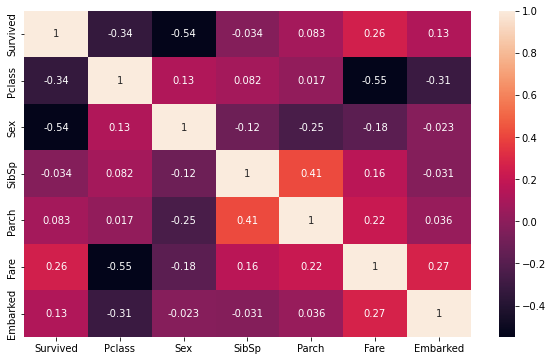

In [108]:
f,ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_train.corr(), annot = True)
# Podemos ver entonces como 'Fare' y 'Survived' tienen una correlación
# del 0.26 (pendiente positiva, luego cuanto mayor es el 'Fare' más
# probabilidades de sobrevivir)

In [109]:
# Verificamos los datos
print(df_train.shape)
print(df_test.shape)

(889, 8)
(417, 8)


In [110]:
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [111]:
print(df_test.head())
print(df_train.head())

   PassengerId  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0          892       3    1   5      0      0   7.8292         0
1          893       3    0   6      1      0   7.0000         1
2          894       2    1   7      0      0   9.6875         0
3          895       3    1   5      0      0   8.6625         1
4          896       3    0   4      1      1  12.2875         1
   Survived  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0         0       3    1   4      1      0   7.2500       1.0
1         1       1    0   5      1      0  71.2833       2.0
2         1       3    0   5      0      0   7.9250       1.0
3         1       1    0   5      1      0  53.1000       1.0
4         0       3    1   5      0      0   8.0500       1.0


In [112]:
# APLICACION DE ALGORITMOS DE MACHINE LEARNING

# Separamos la columna con la informacion de los supervivientes
x = np.array(df_train.drop(['Survived'], axis = 1))      # aquí estarán las variables para construir el modelo
y = np.array(df_train['Survived'])     # aquí se encontrará el resultado

# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

# Separo los datos de 'train' en entrenamiento y prueba para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# ALGORITMOS CON LOS QUE VAMOS A TRABAJAR (incluimos métodos al principio)
# Regresión logística
logreg = LogisticRegression()
scaler_train = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler_train.transform(x_train)
logreg.fit(x_train_scaled, y_train)        # con 'fit' entrenamos el modelo
y_pred = logreg.predict(x_test)
print('Precisión Regresión Logística:')
logreg_score = logreg.score(x_train_scaled, y_train)
print(logreg_score)

Precisión Regresión Logística:
0.8030942334739803


In [113]:
# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Precisión Soporte de Vectores:')
svc_score = svc.score(x_train, y_train)
print(svc_score)

Precisión Soporte de Vectores:
0.6835443037974683


In [114]:
# K neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Precisión Vecinos Más Cercanos:')
knn_score = knn.score(x_train, y_train)
print(knn_score)

Precisión Vecinos Más Cercanos:
0.8509142053445851


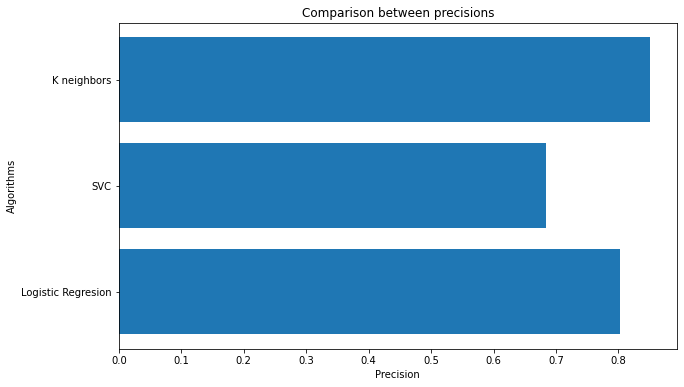

In [115]:
# Gráfica comparativa de las precisiones de los algoritmos
precision = [logreg_score, svc_score, knn_score]
algoritmos=['Logistic Regresion', 'SVC', 'K neighbors']
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(algoritmos, precision)
ax.set_ylabel('Algorithms')
ax.set_xlabel('Precision')
ax.set_title('Comparison between precisions')
plt.show()

In [116]:
# PREDICCION UTILIZANDO LOS MODELOS
# Regresión logística
ids = df_test['PassengerId']        # mostraremos, utilizando el id, quien sobrevive al naufragio
prediccion_logreg = logreg.predict(df_test.drop('PassengerId', axis = 1))
out_logreg = pd.DataFrame({'PassengerId' : ids, 'Survived' : prediccion_logreg})
print('Prediccion Regresion Logistica')
print(out_logreg.head())

Prediccion Regresion Logistica
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


/home/javier/anaconda3/envs/curso_python/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/javier/anaconda3/envs/curso_python/lib/python3.8/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [117]:
# Support Vector Machines
prediccion_svc = svc.predict(df_test.drop('PassengerId', axis = 1))
out_svc = pd.DataFrame({'PassengerId' : ids, 'Survived' : prediccion_svc})
print('Prediccion Soporte de Vectores')
print(out_svc.head())

Prediccion Soporte de Vectores
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


/home/javier/anaconda3/envs/curso_python/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [118]:
# K neighbors
prediccion_knn = knn.predict(df_test.drop('PassengerId', axis = 1))
out_knn = pd.DataFrame({'PassengerId' : ids, 'Survived' : prediccion_knn})
print('Prediccion Vecinos Más Cercanos')
print(out_knn.head())

/home/javier/anaconda3/envs/curso_python/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/javier/anaconda3/envs/curso_python/lib/python3.8/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Prediccion Vecinos Más Cercanos
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


Text(0.5, 1.0, 'K Neighbours Prediction')

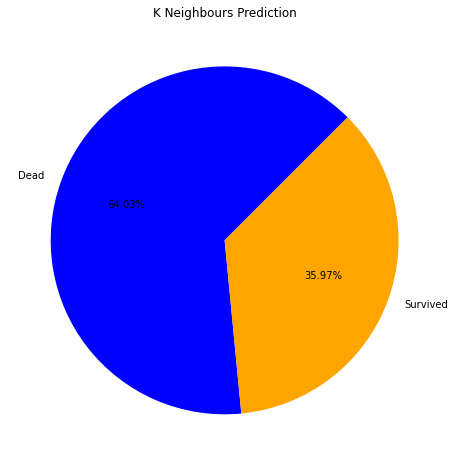

In [119]:
# GRAFICAS
# Porcentaje de supervivientes según K Neighbours
plt.figure(figsize=(8,8))
plt.pie(out_knn['Survived'].value_counts(), colors=['blue', 'orange'], labels=['Dead', 'Survived'], autopct='%.2f%%',startangle=45)
plt.title('K Neighbours Prediction')

In [183]:
supervivientes = out_knn['Survived'] == 1
no_supervivientes = out_knn['Survived'] == 0
survive = [out_knn[supervivientes].shape[0], out_knn[no_supervivientes].shape[0]]
#out_knn[supervivientes].shape[0]       # Si pusieramos 1 obtendriamos el numero de columnaas
#out_knn[no_supervivientes].shape[0]

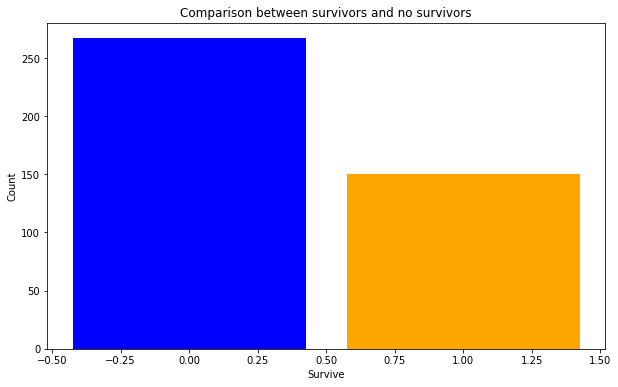

In [206]:
fig,ax = plt.subplots(figsize=(10,6))
ax.bar([1,0], survive, width=0.85, color=['orange', 'blue'])
ax.set_ylabel('Count')
ax.set_xlabel('Survive')
ax.set_title('Comparison between survivors and no survivors')
plt.show()

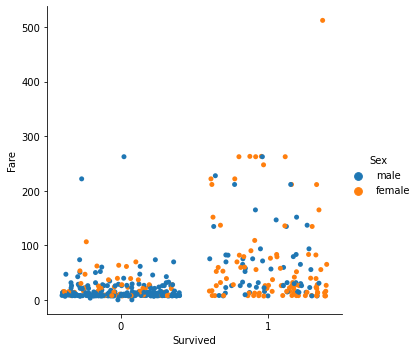

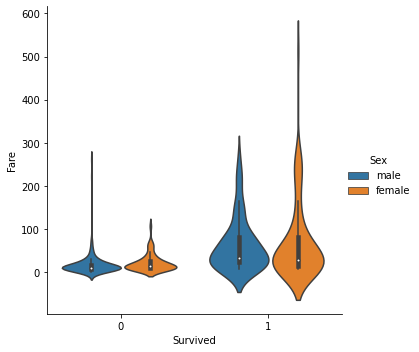

In [155]:
# RELACION ENTRE TARIFA Y SUPERVIVENCIA, DISTINGUIENDO SEXOS

df_test['Sex'].replace([0, 1], ['female','male'], inplace=True)
prediccion_fare_knn = pd.DataFrame({'Survived':prediccion_knn, 'Fare': df_test['Fare'], 'Sex':df_test['Sex']})
prediccion_fare_knn
sns.catplot(x = "Survived", y="Fare", data = prediccion_fare_knn,jitter=0.4, hue='Sex', aspect = 1)
sns.catplot(x = "Survived", y="Fare", data = prediccion_fare_knn,jitter=1, hue='Sex', aspect = 1, kind = 'violin')